In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Read csv file and convert into dataframe
data=pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
#Understand data at high level.Check the statistics of data set
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data.drop(columns=['Standard Error', 'Region', 'Dystopia Residual'], inplace=True)


Now the data looks good and there are no missing values.

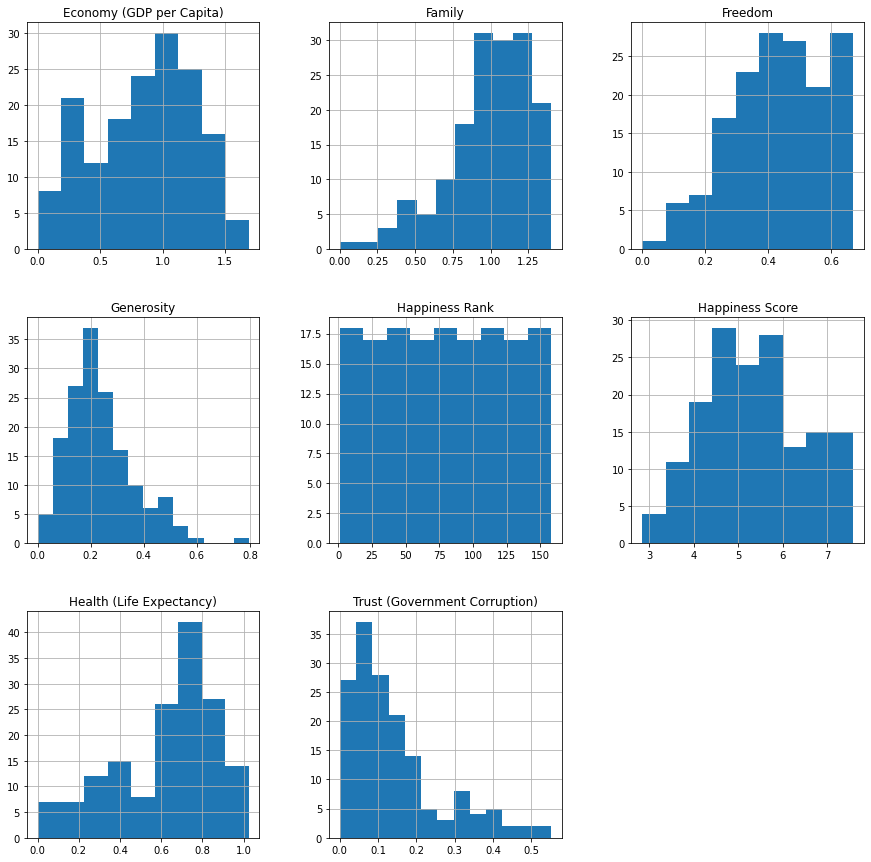

In [6]:
data.hist(bins='auto', figsize=(15,15));

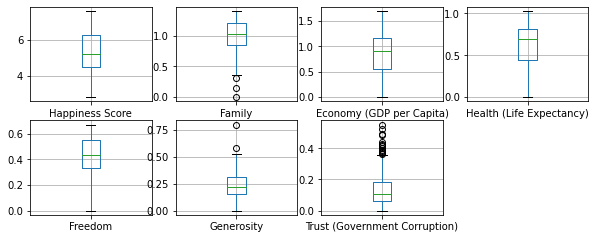

In [7]:
data[['Happiness Score', 'Family','Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

Outliers were checked for using boxplots. The output shows there are outliers in the Family,Generosity, and Perceptions of Corruption features.

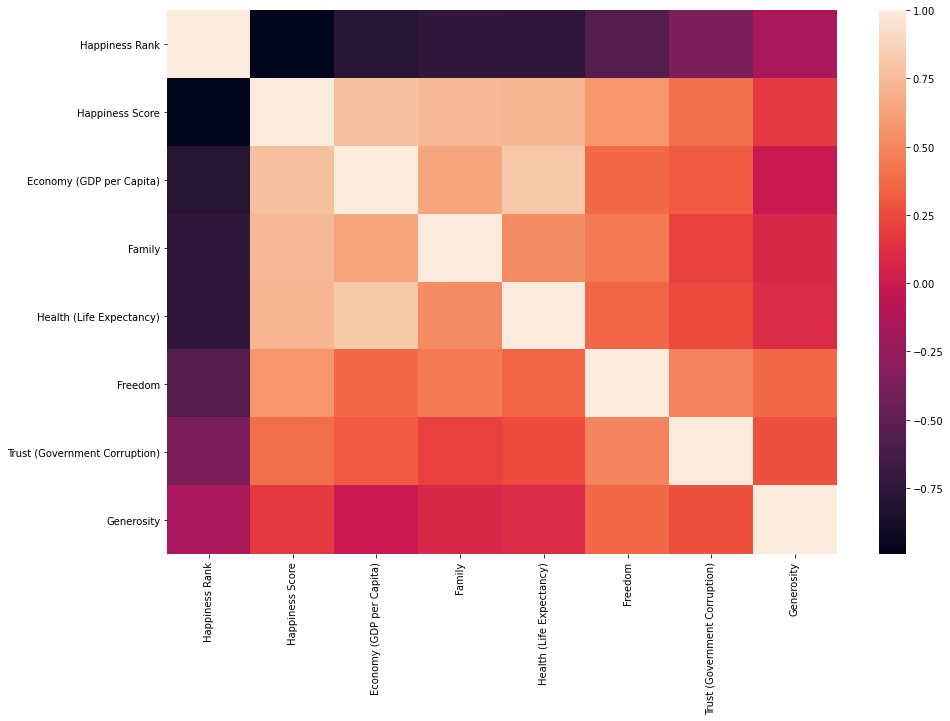

In [8]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(data.corr())

The map shows that the Happiness Score correlates strongly with GDP per capita and Healthy Life Expectancy. It has a low correlation with Generosity and Trust(Government Corruption). Also, the negative coefficient between Happiness rank and Happiness score shows that they have an inverse relationship,the lower the score, the higher the rank.

We can further use a scatter plot to view the relationship between Happiness Score and GDP per capita.


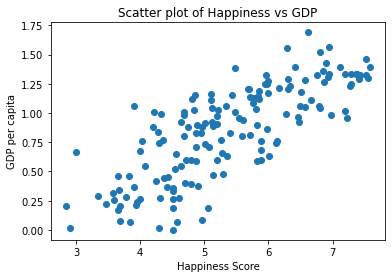

In [9]:
happiness_score = data['Happiness Score']
gdp= data['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()

In [10]:
#Happy countries
happy_countries = data[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
happy_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [11]:
#Sad countries
sad_countries=data[['Country','Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)',ascending=True)
sad_countries.head()

,Economy (GDP per Capita)
Country,
Congo (Kinshasa),0.00000
Burundi,0.01530
Malawi,0.01604
Niger,0.06940
Liberia,0.07120


In [12]:
#Countries with highest life expectency
healthy_countries = data[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
healthy_countries.head()

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [13]:
# Some countries with extremely low life expectancy
low_life_expectancy = data[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=True)
low_life_expectancy.head()

,Country,Health (Life Expectancy)
122,Sierra Leone,0.00000
127,Botswana,0.04776
147,Central African Republic,0.06699
100,Swaziland,0.07566
96,Lesotho,0.07612


In [14]:
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## Modelling and Prediction
Here I am using Linear Regression to predict the happiness score.

In [15]:
#Dropping non-numeric columns from the data set
new_data=data.drop(['Country','Happiness Rank'],axis=1)
new_data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [16]:
#splitting the data
from sklearn.model_selection import train_test_split

In [17]:
X = new_data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity']]
y = new_data['Happiness Score']


In [18]:
#Data Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
X_scaled

array([[ 1.36962124e+00,  1.32028142e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  4.71039706e-01],
       [ 1.13522625e+00,  1.51445776e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.57585637e+00],
       [ 1.19286069e+00,  1.36105403e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  8.24292797e-01],
       [ 1.52512972e+00,  1.25192192e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  8.68637502e-01],
       [ 1.19487640e+00,  1.22120434e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  1.74856316e+00],
       [ 1.10518965e+00,  1.20518259e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00, -2.99762791e-02],
       [ 1.20271529e+00,  1.06489092e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  1.89102052e+00],
       [ 1.20836426e+00,  1.09767107e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  9.92406743e-01],
       [ 1.00547410e+00,  1.21037585e+00,  1.129

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)
y_train.head()

16     6.946
130    4.292
134    4.194
22     6.810
93     4.971
Name: Happiness Score, dtype: float64

In [21]:
regression=LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [22]:
new_data.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [23]:
print('Happiness Score:',regression.predict(scaler.transform([[0.01530,0.41587,0.22396,0.11850,0.10062,0.19727]])))

Happiness Score: [2.90466119]


In [24]:
regression.score(X_train,y_train)

0.7934954655229758

Let's check how well model fits the test data.

In [25]:
regression.score(X_test,y_test)

0.674959293275678

Let's plot and visualize

In [26]:
y_pred=regression.predict(X_test)

In [27]:
y_pred

array([7.06870825, 5.95019071, 4.38328038, 4.59321906, 5.84165172,
       4.22179829, 4.09701657, 4.02190553, 4.66497009, 5.34035749,
       6.18106733, 4.63785423, 6.02271005, 5.96651734, 3.67780437,
       5.96832617, 4.62445984, 5.06508235, 5.04511211, 5.73442587,
       6.60541326, 6.12531833, 6.28346624, 7.0008167 , 6.08903633,
       6.020489  , 5.11423649, 6.75285581, 4.85660958, 4.11520713,
       4.93790399, 6.54316592])

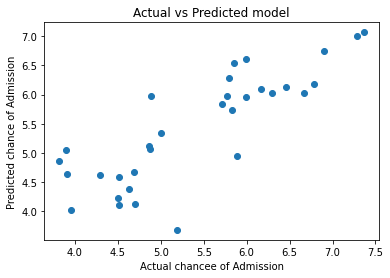

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chancee of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs Predicted model')
plt.show()

### Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
y_pred=regression.predict(X_test)

In [31]:
mean_absolute_error(y_test,y_pred)

0.44396181617856234

In [32]:
mean_squared_error(y_test,y_pred)

0.3323637592572748

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5765099819233617